In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


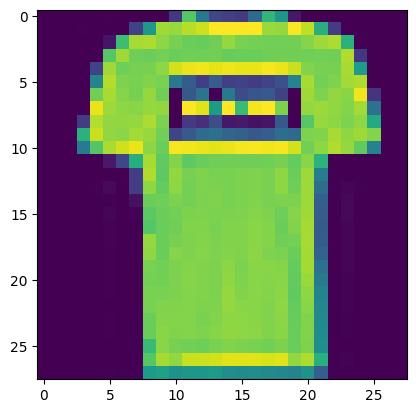

In [3]:
plt.imshow(x_train[1])

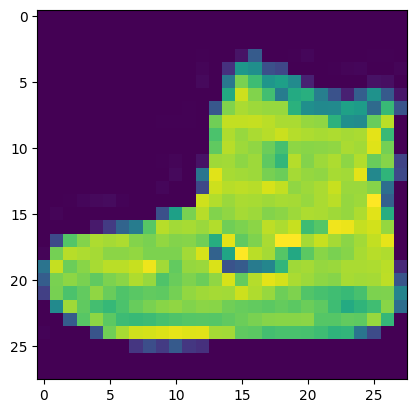

In [4]:
 plt.imshow(x_train[0])

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
model = keras.Sequential([keras.layers.Conv2D(32, (3,3), activation='relu',
input_shape=(28,28,1)), keras.layers.MaxPooling2D((2,2)), keras.layers.Dropout(0.25),
keras.layers.Conv2D(64, (3,3), activation='relu'), keras.layers.MaxPooling2D((2,2)), 
keras.layers.Dropout(0.25),
keras.layers.Conv2D(128, (3,3), activation='relu'),keras.layers.Flatten(), 
keras.layers.Dense(128, activation='relu'), keras.layers.Dropout(0.25), 
keras.layers.Dense(10, activation='softmax') ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 83s 43ms/step - loss: 0.5696 - accuracy: 0.7876 - val_loss: 0.4002 - val_accuracy: 0.8544
Epoch 2/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.3733 - accuracy: 0.8615 - val_loss: 0.3159 - val_accuracy: 0.8864
Epoch 3/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.3267 - accuracy: 0.8808 - val_loss: 0.3046 - val_accuracy: 0.8862
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2980 - accuracy: 0.8890 - val_loss: 0.2882 - val_accuracy: 0.8940
Epoch 5/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2806 - accuracy: 0.8956 - val_loss: 0.2701 - val_accuracy: 0.8998
Epoch 6/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2645 - accuracy: 0.9010 - val_loss: 0.2639 - val_accuracy: 0.9011
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2552 - accuracy: 0.9054 - val_loss: 0.2560 -

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.2704 - accuracy: 0.9017
Test accuracy: 0.9017000198364258
